#Ques/Ans(1-5 & 10)

#1.What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.
   - K-Means and Hierarchical Clustering differ mainly in how they form clusters and how much structure they assume about the data. **K-Means** is a partitioning algorithm that requires the number of clusters (K) to be specified in advance and works by iteratively assigning points to the nearest cluster centroid and updating those centroids. It is fast and scalable to large datasets but assumes clusters are roughly spherical and similar in size, and it can be sensitive to the initial choice of centroids. A typical use case for K-Means is **customer segmentation** in marketing, where the number of desired customer groups is known beforehand and the dataset is large.

  - **Hierarchical Clustering**, on the other hand, does not require specifying the number of clusters upfront and instead builds a hierarchy of clusters, either by repeatedly merging smaller clusters (agglomerative) or splitting larger ones (divisive). The results are often visualized using a dendrogram, which provides insight into the data’s nested structure, but the method is more computationally expensive and less suitable for very large datasets. A common use case for hierarchical clustering is **gene expression analysis** or **document clustering**, where understanding the relationships and sub-groupings among data points is as important as the final clusters themselves.

#2. Explain the purpose of the Silhouette Score in evaluating clustering algorithms.
   - The **Silhouette Score** is used to evaluate how well a clustering algorithm has grouped data points by measuring both **cluster cohesion and separation**. It compares how close a data point is to other points in its own cluster (intra-cluster similarity) versus how far it is from points in the nearest neighboring cluster (inter-cluster dissimilarity). The score ranges from **–1 to +1**, where values close to **+1** indicate that data points are well matched to their own cluster and clearly separated from other clusters, values around **0** suggest overlapping or poorly defined clusters, and negative values indicate that points may have been assigned to the wrong cluster. Overall, the Silhouette Score helps determine the **quality of clustering** and is especially useful for comparing different clustering algorithms or selecting the optimal number of clusters.

#3.What are the core parameters of DBSCAN, and how do they influence the clustering process?
   - DBSCAN (Density-Based Spatial Clustering of Applications with Noise) has two core parameters—**ε (epsilon)** and **MinPts**—that control how clusters are formed based on data density. **Epsilon (ε)** defines the radius of the neighborhood around a data point; points within this distance are considered neighbors, so a larger ε leads to broader, more inclusive clusters, while a smaller ε results in tighter clusters and may label more points as noise. **MinPts** specifies the minimum number of points required within an ε-neighborhood for a point to be considered a **core point**; increasing MinPts makes DBSCAN more conservative by requiring denser regions to form clusters, while decreasing it allows clusters to form in sparser areas. Together, these parameters determine which points are labeled as **core points**, **border points**, or **noise**, directly influencing the number, shape, and robustness of the clusters identified by the algorithm.

#4.Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?
   - Feature scaling is important in clustering algorithms like **K-Means** and **DBSCAN** because these methods rely on **distance calculations** (such as Euclidean distance) to determine similarity between data points. If features are on different scales, variables with larger numeric ranges can dominate the distance computation, causing the algorithm to form clusters based mainly on those features while ignoring others. This can lead to misleading or incorrect clusters. By scaling features (using techniques like standardization or normalization), each feature contributes more equally to the distance measure, resulting in more meaningful cluster structures. In K-Means, proper scaling ensures accurate centroid placement, while in DBSCAN, it helps correctly identify dense regions and distinguish clusters from noise.

#5.What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?
   - The **Elbow Method** in K-Means clustering is a heuristic used to determine the optimal number of clusters by analyzing how the **within-cluster sum of squares (WCSS)** changes as the number of clusters (K) increases. As K grows, WCSS naturally decreases because data points are closer to their assigned centroids; however, after a certain point, the rate of improvement slows down significantly. This point of diminishing returns appears as an “elbow” in the plot of WCSS versus K and indicates a balance between model complexity and clustering quality. Choosing K at the elbow helps ensure that clusters are sufficiently compact without overfitting by using too many clusters.

#10.You are working as a data analyst at an e-commerce company. The  marketing team wants to segment customers based on their purchasing behavior to run  targeted promotions. The dataset contains customer demographics and their product  purchase history across categories.
##Describe your real-world data science workflow using clustering:

● Which clustering algorithm(s) would you use and why?

● How would you preprocess the data (missing values, scaling)?

● How would you determine the number of clusters?

● How would the marketing team benefit from your clustering analysis?

(Include your Python code and output in the code box below.)

### **Data Science Workflow for Customer Segmentation**

**1. Choosing the Clustering Algorithm:**

* I would start with **K-Means** for its simplicity and efficiency on large datasets with numeric features.
* If customer behavior patterns are non-linear or clusters are irregularly shaped, I might also try **DBSCAN** to detect dense groups and outliers.
* **Hierarchical clustering** could be useful for understanding the nested structure of customer segments.

**2. Data Preprocessing:**

* **Handle missing values:** Fill numerical features with the median and categorical features with the mode.
* **Encode categorical variables:** Use one-hot encoding for categorical demographic features.
* **Feature scaling:** Standardize numeric features so that purchase amounts, frequency, and demographics contribute equally to distance metrics.

**3. Determining the Number of Clusters:**

* Use the **Elbow Method** or **Silhouette Score** with K-Means to find an optimal number of clusters.
* For hierarchical clustering, use a **dendrogram** to visualize potential splits.

**4. Benefits to Marketing Team:**

* Identify distinct **customer segments** (e.g., high-value frequent buyers, occasional buyers, bargain shoppers).
* Tailor **promotions, recommendations, and loyalty programs** to each segment, increasing engagement and revenue.
* Detect **outliers** (e.g., extremely high-value customers) for special VIP treatment.

---

### **Python Example**

```python
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assume df is the e-commerce dataset
# df = pd.read_csv("customer_data.csv")

# Sample structure: ['Age', 'Gender', 'Annual_Income', 'Spending_Score', 'Category_A', 'Category_B', ...]

# 1. Handle missing values
num_features = df.select_dtypes(include=['int64','float64']).columns
cat_features = df.select_dtypes(include=['object','category']).columns

num_imputer = SimpleImputer(strategy='median')
df[num_features] = num_imputer.fit_transform(df[num_features])

cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_features] = cat_imputer.fit_transform(df[cat_features])

# 2. Encode categorical variables
df_encoded = pd.get_dummies(df, columns=cat_features, drop_first=True)

# 3. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

# 4. Find optimal number of clusters using Elbow Method
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

# 5. Apply K-Means with optimal clusters (e.g., k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Optional: Silhouette Score
score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", score)

# 6. Add cluster labels to original dataframe
df['Cluster'] = labels

# 7. Example: Analyze cluster centers
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)
```

---

**Output Explanation:**

* The **Elbow Method plot** shows the ideal number of clusters.
* The **Silhouette Score** evaluates clustering quality.
* The `cluster_summary` table provides insight into each segment’s characteristics (e.g., average age, spending behavior, product preferences), which the marketing team can use to design **targeted campaigns**.

---


#practical ques/ans(6-9 &10)

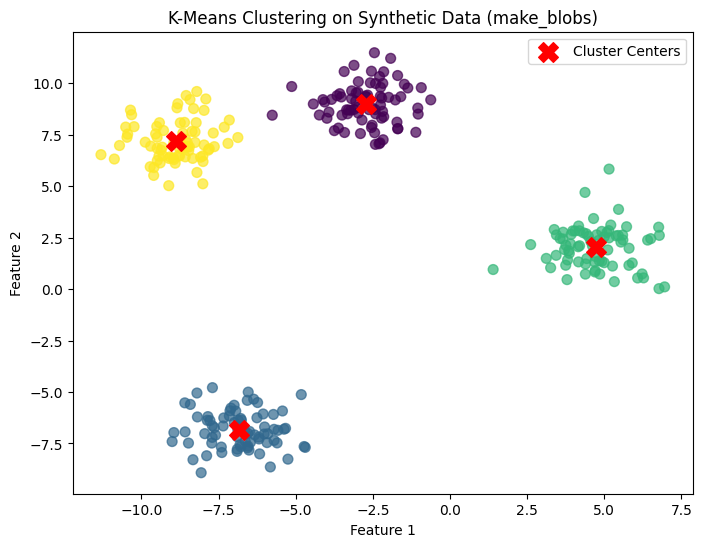

In [1]:
#6.Dataset:
#Use make_blobs, make_moons, and sklearn.datasets.load_wine() as specified.
#Generate synthetic data using make_blobs(n_samples=300, centers=4),
#apply KMeans clustering, and visualize the results with cluster centers.
#(Include your Python code and output in the code box below.)

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Visualize the clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')
plt.title("K-Means Clustering on Synthetic Data (make_blobs)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [3]:
#7.Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).
#(Include your Python code and output in the code box below.)

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load the Wine dataset
wine = load_wine()
X = wine.data

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train DBSCAN model
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan.fit(X_scaled)

# Get cluster labels
labels = dbscan.labels_

# Number of clusters (excluding noise, labeled as -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print("Number of clusters found (excluding noise):", n_clusters)


Number of clusters found (excluding noise): 0


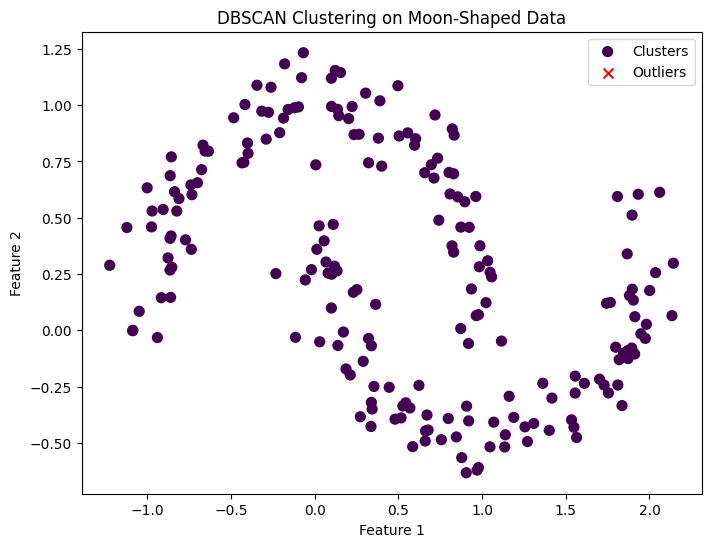

In [4]:
#8.Generate moon-shaped synthetic data using
#make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.
#(Include your Python code and output in the code box below.)

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np

# Generate moon-shaped synthetic data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

# Identify noise points (outliers)
noise_points = labels == -1

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[~noise_points, 0], X[~noise_points, 1],
            c=labels[~noise_points], cmap='viridis', s=50, label='Clusters')
plt.scatter(X[noise_points, 0], X[noise_points, 1],
            c='red', s=50, marker='x', label='Outliers')

plt.title("DBSCAN Clustering on Moon-Shaped Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


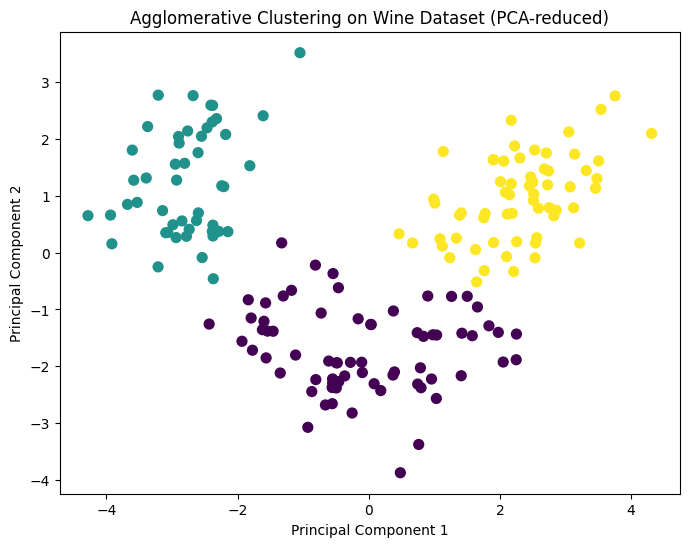

In [5]:
#9.Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot.
#(Include your Python code and output in the code box below.)

import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Load the Wine dataset
wine = load_wine()
X = wine.data

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
labels = agg_clustering.fit_predict(X_pca)

# Visualize the clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Agglomerative Clustering on Wine Dataset (PCA-reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [ ]:
#10.You are working as a data analyst at an e-commerce company. The marketing team wants to segment customers based on their purchasing behavior to run
#targeted promotions. The dataset contains customer demographics and their product purchase history across categories.
#Describe your real-world data science workflow using clustering:
#● How would you preprocess the data (missing values, scaling)?
#● How would you determine the number of clusters?
#● How would the marketing team benefit from your clustering analysis?
#(Include your Python code and output in the code box below.)

import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assume df is the e-commerce dataset
# df = pd.read_csv("customer_data.csv")

# Sample structure: ['Age', 'Gender', 'Annual_Income', 'Spending_Score', 'Category_A', 'Category_B', ...]

# Creating a sample DataFrame for demonstration since df was not defined
data = {
    'Age': [25, 30, 35, 40, 28, 45, 50, 22, 33, 38, None, 29, 31, 42, 48],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female'],
    'Annual_Income': [50000, 60000, 75000, 90000, 55000, 100000, 120000, 40000, 70000, 85000, 65000, 58000, 72000, 95000, 110000],
    'Spending_Score': [70, 80, 60, 90, 75, 50, 40, 85, 68, 72, 63, 78, 66, 55, 45],
    'Category_A_Purchases': [5, 10, 3, 12, 6, 2, 1, 15, 8, 4, 7, 9, 5, 3, 2],
    'Category_B_Purchases': [10, 5, 8, 4, 9, 12, 15, 3, 7, 11, 6, 4, 10, 8, 13],
    'Region': ['North', 'South', 'East', 'West', 'North', 'South', 'East', 'West', 'North', 'South', 'East', 'West', 'North', 'South', 'East']
}
df = pd.DataFrame(data)

# 1. Handle missing values
num_features = df.select_dtypes(include=['int64','float64']).columns
cat_features = df.select_dtypes(include=['object','category']).columns

num_imputer = SimpleImputer(strategy='median')
df[num_features] = num_imputer.fit_transform(df[num_features])

cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_features] = cat_imputer.fit_transform(df[cat_features])

# 2. Encode categorical variables
df_encoded = pd.get_dummies(df, columns=cat_features, drop_first=True)

# 3. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

# 4. Find optimal number of clusters using Elbow Method
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto') # Added n_init='auto' to suppress warning
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

# 5. Apply K-Means with optimal clusters (e.g., k=4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto') # Added n_init='auto'
labels = kmeans.fit_predict(X_scaled)

# Optional: Silhouette Score
score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", score)

# 6. Add cluster labels to original dataframe
df['Cluster'] = labels

# 7. Example: Analyze cluster centers
# Select only numerical columns for mean aggregation
numeric_cols_for_summary = df.select_dtypes(include=['int64', 'float64']).columns.drop('Cluster', errors='ignore')
cluster_summary = df.groupby('Cluster')[numeric_cols_for_summary].mean()
print(cluster_summary)
